In [526]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sn

In [527]:
df=pd.read_csv("lab6_Employeedataset.csv")
print(df)

       avg_monthly_hrs   department  filed_complaint  last_evaluation  \
0                  221  engineering              NaN         0.932868   
1                  232      support              NaN              NaN   
2                  184        sales              NaN         0.788830   
3                  206        sales              NaN         0.575688   
4                  249        sales              NaN         0.845217   
...                ...          ...              ...              ...   
14244              178           IT              NaN         0.735865   
14245              257        sales              NaN         0.638604   
14246              232      finance              1.0         0.847623   
14247              130           IT              NaN         0.757184   
14248              159          NaN              NaN         0.578742   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  
0               4                NaN     low

In [528]:
col_Name=df.columns
print(col_Name)
print(len(col_Name))
for x in col_Name:
    print(type(x))


Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure'],
      dtype='object')
10
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [529]:
df.size
r=df.shape[0]
print(f"the no of rows are :{r}")
c=df.shape[1]
print(f"the no of cols are :{c}")

the no of rows are :14249
the no of cols are :10


In [530]:
#Explortary data analysis EDA

df.isnull() # table formate with true or false
df.isnull().any()
df.isnull().sum() #count of each column which contains the null values

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [531]:
df.head(7)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0


In [532]:
df.tail(3)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


In [533]:
df.sample(6)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
13260,209,IT,1.0,0.617994,4,NaN,medium,1.000000,Employed,8.0
12324,160,product,NaN,0.545406,5,NaN,low,0.890643,Employed,4.0
13130,143,engineering,NaN,NaN,2,NaN,high,0.418288,Left,3.0
95,219,support,NaN,1.000000,5,NaN,low,0.734579,Left,5.0
7328,207,IT,NaN,0.476377,4,NaN,medium,0.659445,Employed,3.0
7619,262,sales,NaN,0.857313,6,NaN,high,0.433408,Employed,6.0


### Data Imputation
Data imputation is a technique used to handle missing data in a dataset.
When you encounter missing values (NaN), instead of removing the rows or columns with missing values,
you can replace them with substituted values.
This helps maintain the size of the dataset and ensures that valuable information isn't lost.

In [535]:
#handling the null values for different columns
print(f"before ,{df['tenure']}")
null_count=df['tenure'].isnull().sum() #181
mean=df['tenure'].mean()
print("the dataste",mean)
df['tenure']=df['tenure'].fillna(mean)
print(f"the after{df['tenure']}")
#similarly

df['last_evaluation'] = df['last_evaluation'].fillna((df['last_evaluation'].mean()))
df['satisfaction'] = df['satisfaction'].fillna((df['satisfaction'].mean()))
df['department'] = df['department'].fillna((df['department'].mode()))

before ,0        5.0
1        2.0
2        3.0
3        2.0
4        3.0
        ... 
14244    5.0
14245    2.0
14246    5.0
14247    3.0
14248    3.0
Name: tenure, Length: 14249, dtype: float64
the dataste 3.497227750924083
the after0        5.0
1        2.0
2        3.0
3        2.0
4        3.0
        ... 
14244    5.0
14245    2.0
14246    5.0
14247    3.0
14248    3.0
Name: tenure, Length: 14249, dtype: float64


In [536]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation          0
n_projects               0
recently_promoted    13949
salary                   0
satisfaction             0
status                   0
tenure                   0
dtype: int64

In [537]:
#let replace the rest with 0
df=df.fillna(0)
df.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

In [538]:
c=dataset.dtypes
print("clolumn datatypes",c)
col_name=df.columns
for x in col_name:
    print(type(x))


clolumn datatypes department    float64
dtype: object
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [539]:
df['tenure'].dtype
df.sample(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
4137,223,support,0.0,0.718477,4,0.0,medium,0.794402,Employed,3.000000
7960,191,management,1.0,0.570912,2,0.0,low,0.560957,Employed,3.000000
6436,162,support,0.0,0.950497,3,0.0,low,0.391481,Employed,5.000000
6243,211,support,0.0,0.788531,5,0.0,medium,1.000000,Employed,3.000000
11751,259,support,0.0,0.813778,5,0.0,low,0.883302,Left,5.000000
12668,211,0,0.0,0.546558,4,0.0,low,0.355238,Employed,4.000000
10049,212,IT,0.0,0.564983,4,0.0,low,0.542461,Employed,3.000000
4396,214,support,0.0,0.513493,6,0.0,medium,0.746121,Employed,5.000000
14126,132,temp,0.0,0.718477,2,0.0,medium,0.621295,Left,3.497228
12247,213,product,1.0,0.542955,4,0.0,low,0.503986,Employed,4.000000


<Axes: xlabel='tenure', ylabel='Count'>

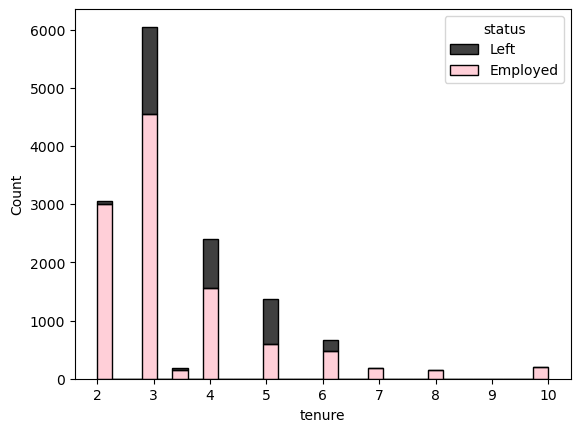

In [540]:
#visualizations :)
sn.histplot(data=df,x='tenure',hue='status',bins=30,multiple='stack',palette=['black', 'pink'])

<Axes: xlabel='satisfaction', ylabel='status'>

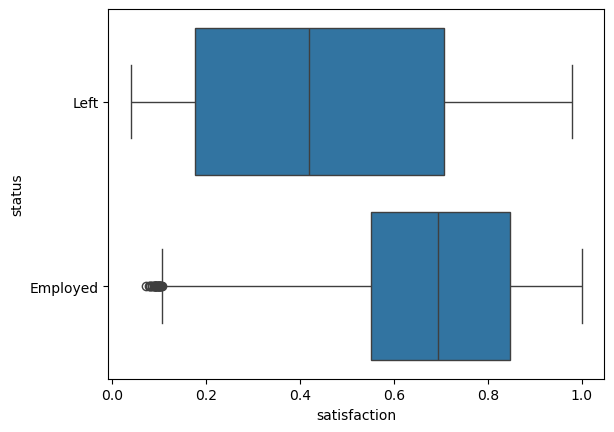

In [541]:
sn.boxplot(data=df,x='satisfaction',y='status')

In [542]:
df['status']
df['status'].unique()

array(['Left', 'Employed'], dtype=object)

status
Employed    10857
Left         3392
Name: count, dtype: int64


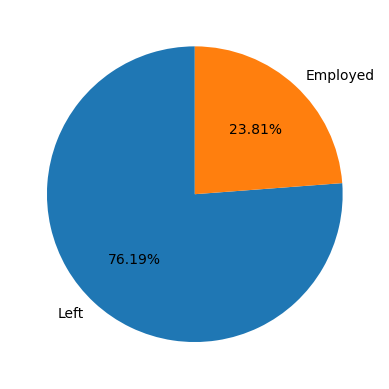

In [543]:
c=df['status'].count()
v=df['status'].value_counts()
print(v)
mp.pie(v,labels=df["status"].unique(),startangle=90,autopct='%1.2f%%')
#autopct='%1.1f%%': Formats and displays the percentage of each slice. %1.1f means the percentage will be shown with one decimal place.

mp.show()

<Axes: xlabel='satisfaction', ylabel='last_evaluation'>

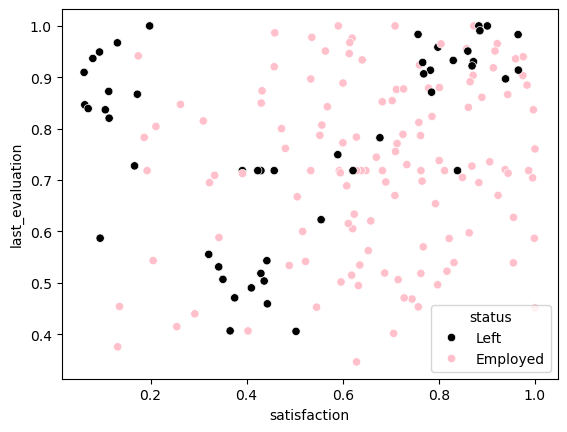

In [544]:
#scatterplot :)
d=df[::80] # start:stop:step
d
sn.scatterplot(data=d,x='satisfaction',y='last_evaluation',hue='status',palette=['black','pink'])

In [545]:
df_left = df[df["status"]=='Left']
df_left

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0
10,147,sales,0.0,0.718477,2,0.0,medium,0.403552,Left,3.0
13,290,engineering,0.0,0.770248,6,0.0,medium,0.090343,Left,4.0
15,258,support,0.0,0.837503,5,0.0,medium,0.849667,Left,5.0
17,252,IT,0.0,0.919196,5,0.0,low,0.893365,Left,5.0
...,...,...,...,...,...,...,...,...,...,...
14234,157,sales,0.0,0.534559,2,0.0,low,0.493401,Left,3.0
14236,242,marketing,0.0,0.985610,4,0.0,low,0.953847,Left,6.0
14239,242,finance,0.0,0.781112,6,0.0,low,0.669866,Left,5.0
14240,131,engineering,0.0,0.531197,2,0.0,low,0.341842,Left,3.0


In [546]:

df_left["last_evaluation"].corr(df_left["satisfaction"])
#it weak =ve correlation since the value is small


0.17796752211958713

In [547]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [548]:

df['department'] = df['department'].astype(str)

In [549]:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols

Index(['department', 'salary', 'status'], dtype='object')

In [550]:

categorical_cols = df.select_dtypes(include="object").columns
encoder = OrdinalEncoder()
encoded_cols = encoder.fit_transform(df[categorical_cols])
df[categorical_cols] = encoded_cols

In [551]:
x = df.drop(columns="status")

In [552]:
y = df["status"]

In [553]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [554]:
x_test

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
5068,285,10.0,0.0,0.952897,2,0.0,0.0,0.844144,3.0
6146,260,3.0,0.0,0.836804,6,0.0,2.0,0.353128,3.0
13911,274,10.0,0.0,0.741130,2,0.0,0.0,0.208102,10.0
1180,263,5.0,0.0,0.723254,4,0.0,1.0,0.578015,5.0
8923,221,3.0,0.0,0.994083,2,0.0,2.0,0.943110,2.0
...,...,...,...,...,...,...,...,...,...
4053,224,10.0,0.0,0.604134,4,0.0,0.0,0.639600,3.0
10055,248,10.0,0.0,0.525023,4,0.0,1.0,0.802385,3.0
9255,140,1.0,0.0,0.603341,5,0.0,1.0,0.467671,2.0
13305,251,4.0,0.0,0.921769,5,0.0,2.0,0.186171,4.0


In [555]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [556]:
#default criterion is gini 
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
train_acc = accuracy_score(model.predict(x_train),y_train)
test_acc = accuracy_score(model.predict(x_test),y_test)

print(f'training accuracy is {train_acc} and testing accuracy is {test_acc}')
print(f"no of depths: {model.get_depth()}")
print(f"no of leaves: {model.get_n_leaves()}")

training accuracy is 0.9997368190192122 and testing accuracy is 0.9642105263157895
no of depths: 26
no of leaves: 436


In [557]:
#pruning
model1 = DecisionTreeClassifier(criterion="entropy")
model1.fit(x_train,y_train)
train_acc = accuracy_score(model1.predict(x_train),y_train)
test_acc = accuracy_score(model1.predict(x_test),y_test)

print(f'training accuracy is {train_acc} and testing accuracy is {test_acc}')
print(f"no of depths: {model.get_depth()}")
print(f"no of leaves: {model.get_n_leaves()}")

training accuracy is 0.9997368190192122 and testing accuracy is 0.9673684210526315
no of depths: 26
no of leaves: 436


In [558]:
from sklearn.model_selection import KFold,GridSearchCV
#defining the hyperparameter grid
para_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [None,5,15,20,25],
    'min_samples_leaf': [1,2,4,6]
}
#setting up cross validation
cv = KFold(n_splits=5,shuffle=True,random_state=1)
grid_search = GridSearchCV(estimator=model,param_grid=para_grid,cv=cv,scoring="accuracy")

In [559]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4, 6]},
             scoring='accuracy')

In [560]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 6}
0.9664006604928292


In [595]:
best_model = grid_search.best_estimator_
preds = best_model.predict(x_test)
print(classification_report(preds,y_test))
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2238
         1.0       0.91      0.95      0.93       612

    accuracy                           0.97      2850
   macro avg       0.95      0.96      0.95      2850
weighted avg       0.97      0.97      0.97      2850

0.9680701754385965
[[2180   33]
 [  58  579]]


C:\Users\lsrin\AppData\Local\Temp\ipykernel_10712\2238958321.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=values, y=labels, palette=['green', 'blue', 'red', 'orange'], ax=ax)


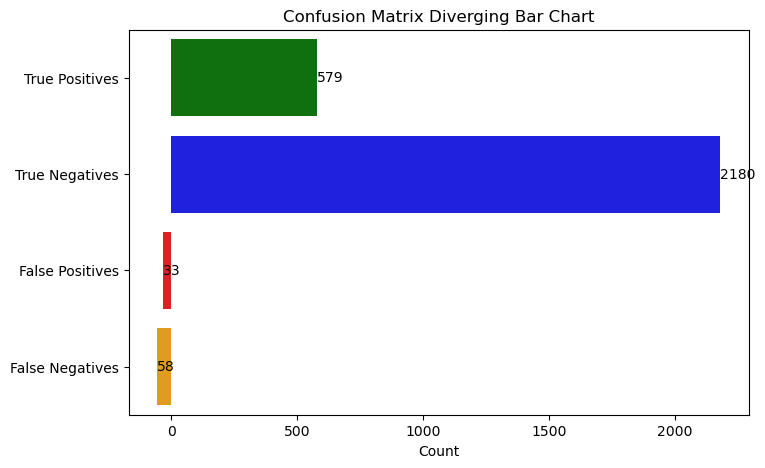

In [601]:
#Compute the Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

#Prepare Data for Plotting
labels = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
values = [tp, tn, -fp, -fn]

#Create the Diverging Bar Chart
fig, ax = mp.subplots(figsize=(8, 5))

sn.barplot(x=values, y=labels, palette=['green', 'blue', 'red', 'orange'], ax=ax)

# Add labels for values
for i, v in enumerate(values):
    ax.text(v + np.sign(v)*0.2, i, f'{abs(v)}', color='black', va='center')

ax.set_title('Confusion Matrix Diverging Bar Chart')
ax.set_xlabel('Count')

mp.show()

In [605]:
gini_importance = model.feature_importances_
entropy_importance = model.feature_importances_
features = x.columns

feature_imp = pd.DataFrame({
    "Feature":features,
    "gini_importance": gini_importance,
    "entropy_importance": entropy_importance
})
feature_imp

,Feature,gini_importance,entropy_importance
0,avg_monthly_hrs,0.193856,0.193856
1,department,0.010606,0.010606
2,filed_complaint,0.001783,0.001783
3,last_evaluation,0.108808,0.108808
4,n_projects,0.121238,0.121238
5,recently_promoted,0.000458,0.000458
6,salary,0.005484,0.005484
7,satisfaction,0.410089,0.410089
8,tenure,0.147678,0.147678


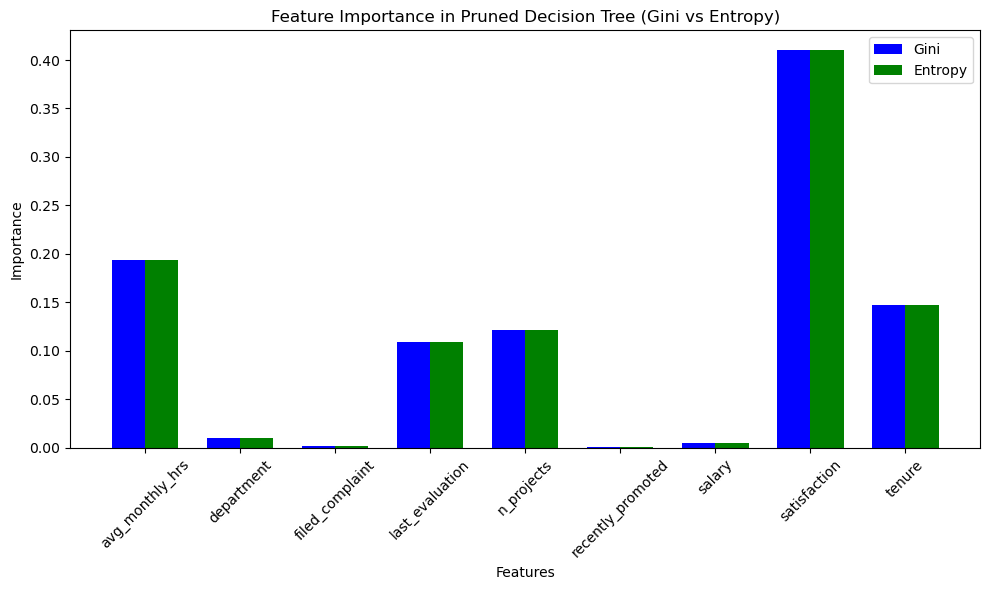

In [611]:
# Plotting the bar chart
fig, ax = mp.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(features))

# Gini bar chart
bar1 = mp.bar(index, feature_imp['gini_importance'], bar_width, label='Gini', color='b')

# Entropy bar chart
bar2 = mp.bar(index + bar_width, feature_imp['entropy_importance'], bar_width, label='Entropy', color='g')

# Adding Labels and Titles
mp.xlabel('Features')
mp.ylabel('Importance')
mp.title('Feature Importance in Pruned Decision Tree (Gini vs Entropy)')
mp.xticks(index + bar_width / 2, features, rotation=45)
mp.legend()

# Display the chart
mp.tight_layout()
mp.show()